<a href="https://colab.research.google.com/github/kyniaz/Trabalho_AM1/blob/main/Colab_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

files.upload()

In [2]:
import pandas as pd

dados = pd.read_csv('gt_2015.csv')

dados.head

<bound method NDFrame.head of            AT      AP      AH    AFDP  ...     TEY     CDP       CO      NOX
0     1.95320  1020.1  84.985  2.5304  ...  116.27  10.799   7.4491  113.250
1     1.21910  1020.1  87.523  2.3937  ...  109.18  10.347   6.4684  112.020
2     0.94915  1022.2  78.335  2.7789  ...  125.88  11.256   3.6335   88.147
3     1.00750  1021.7  76.942  2.8170  ...  132.21  11.702   3.1972   87.078
4     1.28580  1021.6  76.732  2.8377  ...  133.58  11.737   2.3833   82.515
...       ...     ...     ...     ...  ...     ...     ...      ...      ...
7379  3.62680  1028.5  93.200  3.1661  ...  109.08  10.411  10.9930   89.172
7380  4.16740  1028.6  94.036  3.1923  ...  108.79  10.344  11.1440   88.849
7381  5.48200  1028.5  95.219  3.3128  ...  107.81  10.462  11.4140   96.147
7382  5.88370  1028.7  94.200  3.9831  ...  131.41  11.771   3.3134   64.738
7383  6.03920  1028.8  94.547  3.8752  ...  125.41  11.462  11.9810  109.240

[7384 rows x 11 columns]>

Descritiva e algumas coisas a mais.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16c27de810>,
      dtype=object)

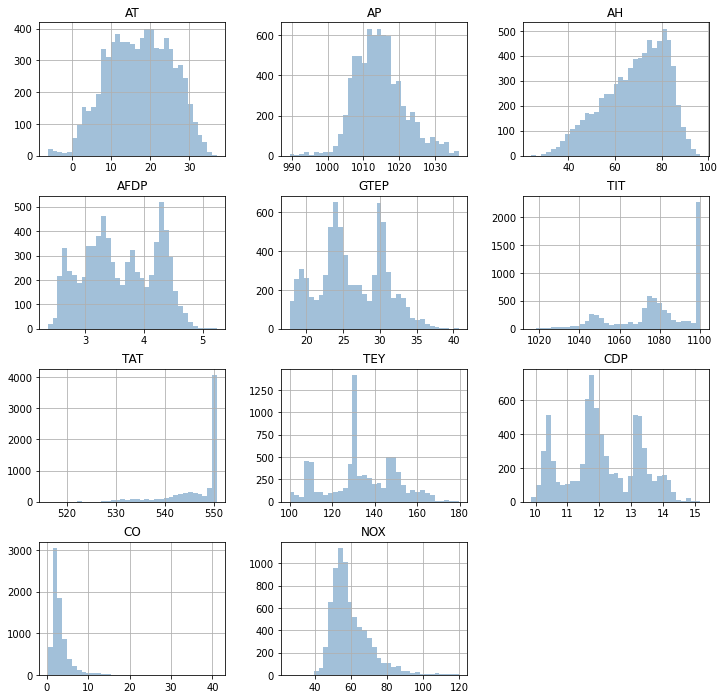

In [3]:
import numpy as np
import seaborn as sb

dados.hist(color='steelblue', alpha=0.5, bins=35, figsize=(12,12))

In [ ]:
corr = dados.iloc[:,0:9].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
AT,1.00,-0.49,-0.47,0.47,0.19,0.33,0.21,0.11,0.20
AP,-0.49,1.00,0.08,-0.09,-0.04,-0.08,-0.29,0.05,0.03
AH,-0.47,0.08,1.00,-0.25,-0.30,-0.26,0.03,-0.18,-0.22
AFDP,0.47,-0.09,-0.25,1.00,0.84,0.92,-0.52,0.88,0.92
GTEP,0.19,-0.04,-0.30,0.84,1.00,0.89,-0.62,0.93,0.94
TIT,0.33,-0.08,-0.26,0.92,0.89,1.00,-0.40,0.95,0.95
TAT,0.21,-0.29,0.03,-0.52,-0.62,-0.40,1.00,-0.63,-0.66
TEY,0.11,0.05,-0.18,0.88,0.93,0.95,-0.63,1.00,0.99
CDP,0.20,0.03,-0.22,0.92,0.94,0.95,-0.66,0.99,1.00


Divisão Treino e Teste


In [5]:
from sklearn.model_selection import train_test_split
#X = dados.iloc[:,[0,1,2,3,6,7]]
X = dados.iloc[:,[0,1,2,6,7]]
y = dados.iloc[:,10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

SVM 


In [7]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

param_grid = [
  {'C': [1, 2, 5, 10, 100], 'kernel': ['linear']},
  {'C': [1, 2, 5, 10, 100], 'gamma': [0.1, 0.001, 0.0001], 'kernel': ['rbf']},
 ]

svmreg = SVR()
clf = make_pipeline(StandardScaler(),GridSearchCV(svmreg, param_grid))

clf.fit(X_train, y_train)

print(clf.named_steps['gridsearchcv'].best_params_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


O escore aqui é: 0.8679460862348419
O Erro Quadrático é: 16.654099224779852
A raiz do Erro Quadrático (RMSE) é: 4.080943423374043
O MAE é: 2.7786688052957964
O R^2 é: 0.8679460862348419
O R^2 ajustado é: 0.8689551303188197


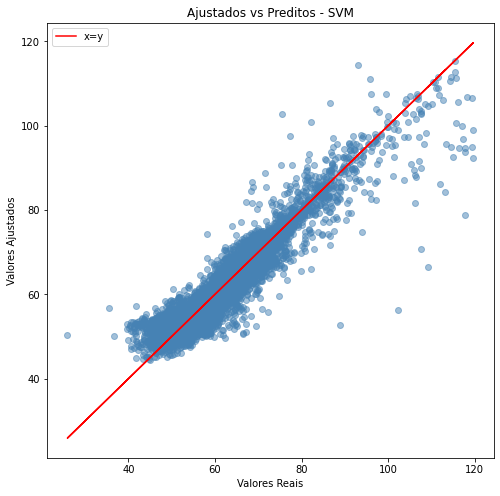

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 8))

print("O escore aqui é:", clf.score(X_test, y_test))
print("O Erro Quadrático é:", mean_squared_error(y_test,clf.predict(X_test)))
print("A raiz do Erro Quadrático (RMSE) é:", math.sqrt(mean_squared_error(y_test,clf.predict(X_test))))
print("O MAE é:", mean_absolute_error(y_test,clf.predict(X_test)))
print("O R^2 é:", r2_score(y_test,clf.predict(X_test)))
print("O R^2 ajustado é:", 1 - (1 - r2_score(y_test,clf.predict(X_test))*((X_train.shape[0] - 1)/(X_train.shape[0] - 6 - 1))))


plt.scatter(y, clf.predict(X),c='steelblue', alpha=0.5)
plt.plot(y, y, color = 'red', label = 'x=y')
plt.title('Ajustados vs Preditos - SVM')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Ajustados')
plt.legend()
plt.show()

Árvores de Regressão e Random Forest


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')
O escore aqui é: 0.832918944878012
O Erro Quadrático é: 21.07157895775048
A raiz do Erro Quadrático (RMSE) é: 4.590378955788997
O MAE é: 3.131815863060851
O R^2 é: 0.832918944878012
O R^2 ajustado é: 0.833887267619587


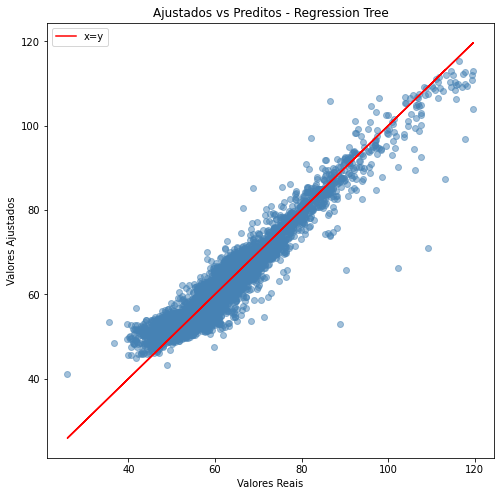

In [ ]:
from sklearn.tree import DecisionTreeRegressor

param_grid_rt = {'max_depth': [1,2,3,4,5,6,7,8,9],
              'max_features': ['auto', 'sqrt', 'log2']}

base_estimator = DecisionTreeRegressor(max_depth = 1, random_state=42)
model_rt = GridSearchCV(base_estimator, param_grid_rf).fit(X_train, y_train)
print(model_rt.best_estimator_)

plt.figure(figsize=(8, 8))

print("O escore aqui é:", model_rt.score(X_test, y_test))
print("O Erro Quadrático é:", mean_squared_error(y_test,model_rt.predict(X_test)))
print("A raiz do Erro Quadrático (RMSE) é:", math.sqrt(mean_squared_error(y_test,model_rt.predict(X_test))))
print("O MAE é:", mean_absolute_error(y_test,model_rt.predict(X_test)))
print("O R^2 é:", r2_score(y_test,model_rt.predict(X_test)))
print("O R^2 ajustado é:", 1 - (1 - r2_score(y_test,model_rt.predict(X_test))*((X_train.shape[0] - 1)/(X_train.shape[0] - 6 - 1))))

plt.scatter(y, model.predict(X),c='steelblue', alpha=0.5)
plt.plot(y, y, color = 'red', label = 'x=y')
plt.title('Ajustados vs Preditos - Regression Tree')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Ajustados')
plt.legend()
plt.show()

Random Forest


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
O escore aqui é: 0.8855356232495403
O Erro Quadrático é: 14.435778794825165
A raiz do Erro Quadrático (RMSE) é: 3.799444537669311
O MAE é: 2.6729734427925607
O R^2 é: 0.8855356232495403
O R^2 ajustado é: 0.8865651163205531


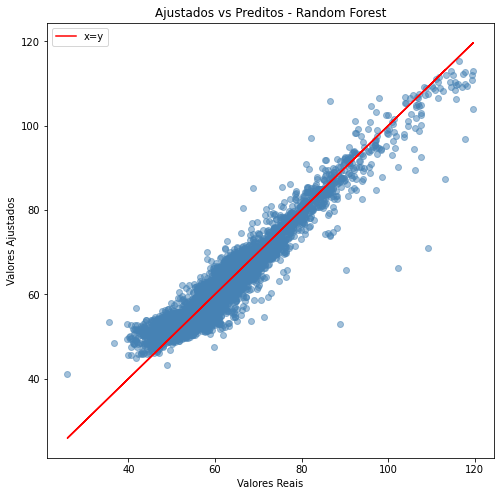

In [ ]:
from sklearn.ensemble import RandomForestRegressor


param_grid_rf = {'max_depth': [1,2,3,4,5,7,9],
              'max_features': ['auto', 'sqrt', 'log2']}

base_estimator = RandomForestRegressor(n_estimators=500, random_state=42)
model = GridSearchCV(base_estimator, param_grid_rf).fit(X_train, y_train)
print(model.best_estimator_)

plt.figure(figsize=(8, 8))

print("O escore aqui é:", model.score(X_test, y_test))
print("O Erro Quadrático é:", mean_squared_error(y_test,model.predict(X_test)))
print("A raiz do Erro Quadrático (RMSE) é:", math.sqrt(mean_squared_error(y_test,model.predict(X_test))))
print("O MAE é:", mean_absolute_error(y_test,model.predict(X_test)))
print("O R^2 é:", r2_score(y_test,model.predict(X_test)))
print("O R^2 ajustado é:", 1 - (1 - r2_score(y_test,model.predict(X_test))*((X_train.shape[0] - 1)/(X_train.shape[0] - 6 - 1))))

plt.scatter(y, model.predict(X),c='steelblue', alpha=0.5)
plt.plot(y, y, color = 'red', label = 'x=y')
plt.title('Ajustados vs Preditos - Random Forest')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Ajustados')
plt.legend()
plt.show()

KNN


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='distance')
O escore aqui é: 0.8703592742087033
O Erro Quadrático é: 16.34975783254967
A raiz do Erro Quadrático (RMSE) é: 4.043483378542525
O MAE é: 2.642433489197907
O R^2 é: 0.8703592742087033
O R^2 ajustado é: 0.8727233102635934


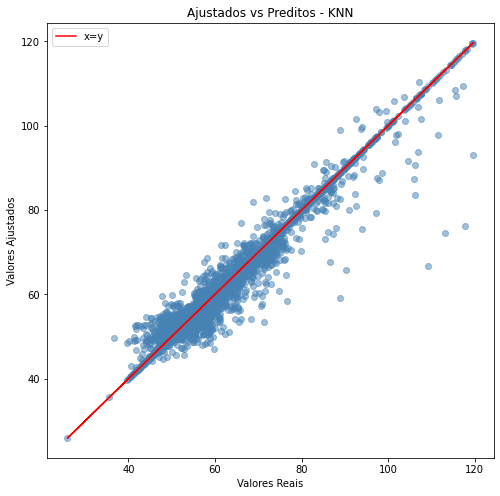

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import kneighbors_graph

base_estimator_knn  = KNeighborsRegressor(n_neighbors=2, weights='distance',algorithm='auto')

param_grid_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'weights':['distance','uniform'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

model_KNN =  GridSearchCV(base_estimator_knn, param_grid_knn).fit(X_train,y_train)

print(model_KNN.best_estimator_)

print("O escore aqui é:", model_KNN.score(X_test, y_test))
print("O Erro Quadrático é:", mean_squared_error(y_test,model_KNN.predict(X_test)))
print("A raiz do Erro Quadrático (RMSE) é:", math.sqrt(mean_squared_error(y_test,model_KNN.predict(X_test))))
print("O MAE é:", mean_absolute_error(y_test,model_KNN.predict(X_test)))
print("O R^2 é:", r2_score(y_test,model_KNN.predict(X_test)))
print("O R^2 ajustado é:", 1 - (1 - r2_score(y_test,model_KNN.predict(X_test))*((X_test.shape[0] - 1)/(X_test.shape[0] - 6 - 1))))

plt.figure(figsize=(8, 8))

plt.scatter(y, model_KNN.predict(X),c='steelblue', alpha=0.5)
plt.plot(y, y, color = 'red', label = 'x=y')
plt.title('Ajustados vs Preditos - KNN')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Ajustados')
plt.legend()
plt.show()

ADABOOST para o KNN (Não utilizado no trabalho)


AdaBoostRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=6,
                                                     p=2, weights='distance'),
                  learning_rate=1.0, loss='exponential', n_estimators=500,
                  random_state=42)
O escore aqui é: 0.8699958657543029
O Erro Quadrático é: 16.39558941971089
A raiz do Erro Quadrático (RMSE) é: 4.049146752059117
O MAE é: 2.633006434293827
O R^2 é: 0.8699958657543029
O R^2 ajustado é: 0.871007292841016


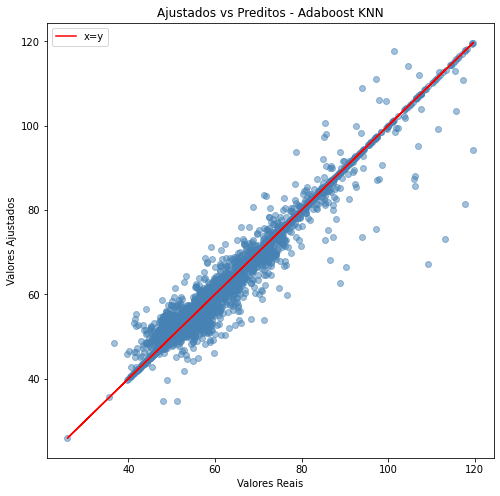

In [10]:
from sklearn.ensemble import AdaBoostRegressor

base_estimator_adaboost = AdaBoostRegressor(base_estimator=model_KNN.best_estimator_, n_estimators=500, random_state=42)

param_grid_adaboost = {'loss':['linear', 'square', 'exponential']}

model_adaboost = GridSearchCV(base_estimator_adaboost,param_grid_adaboost).fit(X_train,y_train)

print(model_adaboost.best_estimator_)

print("O escore aqui é:", model_adaboost.score(X_test, y_test))
print("O Erro Quadrático é:", mean_squared_error(y_test,model_adaboost.predict(X_test)))
print("A raiz do Erro Quadrático (RMSE) é:", math.sqrt(mean_squared_error(y_test,model_adaboost.predict(X_test))))
print("O MAE é:", mean_absolute_error(y_test,model_adaboost.predict(X_test)))
print("O R^2 é:", r2_score(y_test,model_adaboost.predict(X_test)))
print("O R^2 ajustado é:", 1 - (1 - r2_score(y_test,model_adaboost.predict(X_test))*((X_train.shape[0] - 1)/(X_train.shape[0] - 6 - 1))))




plt.figure(figsize=(8, 8))

plt.scatter(y, model_adaboost .predict(X),c='steelblue', alpha=0.5)
plt.plot(y, y, color = 'red', label = 'x=y')
plt.title('Ajustados vs Preditos - Adaboost KNN')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Ajustados')
plt.legend()
plt.show()

[-1.04720342 -0.21722087 -0.29224336 -0.22307727 -0.29998046]
 O escore aqui é: 0.5710041381756744
 O Erro Quadrático é: 52.73780538419107
 A raiz do Erro Quadrático (RMSE) é: 7.262079962668483
 O MAE é: 5.440737938385404
 O R^2 é: 0.5710041381756744
 O R^2 ajustado é: 0.5716679678267216


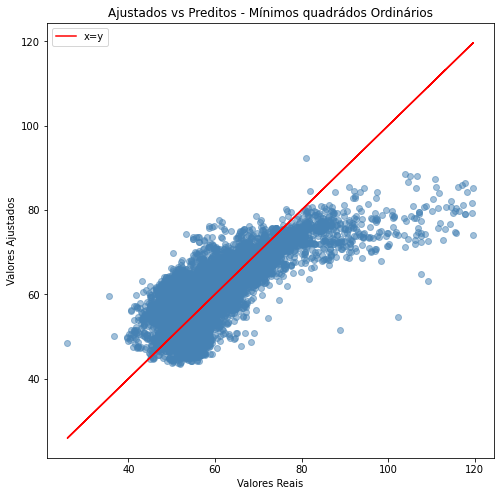

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
import matplotlib.pyplot as plt 


model_lm =  LinearRegression().fit(X_train,y_train)

print(model_lm.coef_)


print(" O escore aqui é:", model_lm.score(X_train, y_train))
print(" O Erro Quadrático é:", mean_squared_error( y_train,model_lm.predict(X_train)))
print(" A raiz do Erro Quadrático (RMSE) é:", math.sqrt(mean_squared_error( y_train,model_lm.predict(X_train))))
print(" O MAE é:", mean_absolute_error( y_train,model_lm.predict(X_train)))
print(" O R^2 é:", r2_score( y_train,model_lm.predict(X_train)))
print(" O R^2 ajustado é:", 1 - (1 - r2_score( y_train,model_lm.predict(X_train))*((X_train.shape[0] - 1)/(X_train.shape[0] - 6 - 1))))

plt.figure(figsize=(8, 8))

plt.scatter(y, model_lm .predict(X),c='steelblue', alpha=0.5)
plt.plot(y, y, color = 'red', label = 'x=y')
plt.title('Ajustados vs Preditos - Mínimos quadrádos Ordinários')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Ajustados')
plt.legend()
plt.show()

ADABOOST Para o modelo linear múltiplo (OLS - ordinary least squares)


AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                  fit_intercept=True,
                                                  n_jobs=None,
                                                  normalize=False),
                  learning_rate=1.5, loss='linear', n_estimators=500,
                  random_state=42)
O escore aqui é: 0.5314343081576967
O Erro Quadrático é: 59.09358763229837
A raiz do Erro Quadrático (RMSE) é: 7.687235369903694
O MAE é: 5.983707837633411
O R^2 é: 0.5314343081576967
O R^2 ajustado é: 0.5320521352937064
A acurácia é: (5631    54.899
1550    63.749
1128    79.151
6497    64.731
3269    52.568
         ...  
4287    55.486
3901    47.640
7263    48.015
1086    78.040
5841    49.238
Name: NOX, Length: 2216, dtype: float64, array([61.37825053, 62.18448134, 76.67587435, ..., 63.60264464,
       80.90155949, 57.05628152]))


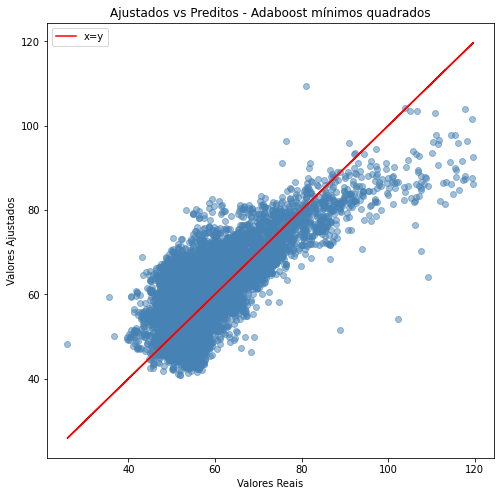

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

base_estimator_adaboost_lm = AdaBoostRegressor(base_estimator=model_lm, n_estimators=500, random_state=42, learning_rate = 2.5)

param_grid_adaboost = {'loss':['linear', 'square', 'exponential'], 'learning_rate':[0.5,1,1.5,2,2.5,3]}

model_adaboost_lm = GridSearchCV(base_estimator_adaboost_lm,param_grid_adaboost).fit(X_train,y_train)



print(model_adaboost_lm.best_estimator_)

print("O escore aqui é:", model_adaboost_lm.score(X_test, y_test))
print("O Erro Quadrático é:", mean_squared_error(y_test,model_adaboost_lm.predict(X_test)))
print("A raiz do Erro Quadrático (RMSE) é:", math.sqrt(mean_squared_error(y_test,model_adaboost_lm.predict(X_test))))
print("O MAE é:", mean_absolute_error(y_test,model_adaboost_lm.predict(X_test)))
print("O R^2 é:", r2_score(y_test,model_adaboost_lm.predict(X_test)))
print("O R^2 ajustado é:", 1 - (1 - r2_score(y_test,model_adaboost_lm.predict(X_test))*((X_train.shape[0] - 1)/(X_train.shape[0] - 6 - 1))))
#print('A acurácia é:', (y_test,model_adaboost_lm.predict(X_test)))



plt.figure(figsize=(8, 8))

plt.scatter(y, model_adaboost_lm .predict(X),c='steelblue', alpha=0.5)
plt.plot(y, y, color = 'red', label = 'x=y')
plt.title('Ajustados vs Preditos - Adaboost mínimos quadrados')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Ajustados')
plt.legend()
plt.show()

Gradient Boosting


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor 

base_estimator_gradient =  GradientBoostingRegressor(n_estimators=50, random_state=42)

param_grid_gradient = {'loss':['ls','lad','huber', 'quantile'], 
                       'criterion':['friedman_mse', 'mse', 'mae'],
                       'max_features':['auto', 'sqrt', 'log2']}

modelo_gradient = GridSearchCV(base_estimator_gradient, param_grid_gradient).fit(X_train, y_train)

print(modelo_gradient.best_estimator_)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


O escore aqui é: 0.8493459015114199
O Erro Quadrático é: 18.999878408076103
A raiz do Erro Quadrático (RMSE) é: 4.358884995968132
O MAE é: 3.2282924523078265
O R^2 é: 0.8493459015114199
O R^2 ajustado é: 0.8503333216643105


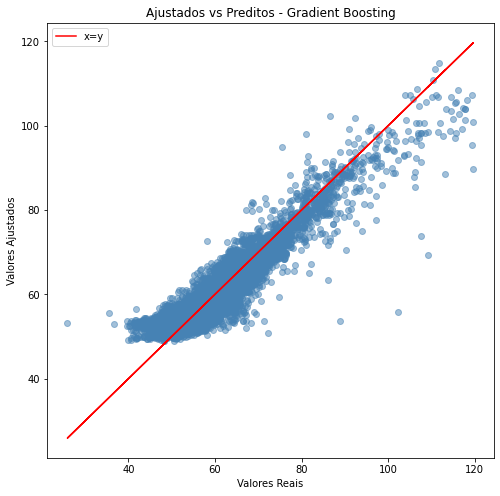

In [ ]:
print("O escore aqui é:", modelo_gradient.score(X_test, y_test))
print("O Erro Quadrático é:", mean_squared_error(y_test,modelo_gradient.predict(X_test)))
print("A raiz do Erro Quadrático (RMSE) é:", math.sqrt(mean_squared_error(y_test,modelo_gradient.predict(X_test))))
print("O MAE é:", mean_absolute_error(y_test,modelo_gradient.predict(X_test)))
print("O R^2 é:", r2_score(y_test,modelo_gradient.predict(X_test)))
print("O R^2 ajustado é:", 1 - (1 - r2_score(y_test,modelo_gradient.predict(X_test))*((X_train.shape[0] - 1)/(X_train.shape[0] - 6 - 1))))



plt.figure(figsize=(8, 8))

plt.scatter(y, modelo_gradient .predict(X),c='steelblue', alpha=0.5)
plt.plot(y, y, color = 'red', label = 'x=y')
plt.title('Ajustados vs Preditos - Gradient Boosting')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Ajustados')
plt.legend()
plt.show()